Lambda layer 와 Concatenate layer 를 사용하여 y = c0 + c1 * x + c2 * x^2 + c3 * x^3 관계를 가진 데이터에서 학습을 통하여 c0, c1, c2, c3 를 찾아내기

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
h1_ABC (Lambda)                 [(None, 1), (None, 1 0           x[0][0]                          
__________________________________________________________________________________________________
concat (Concatenate)            (None, 3)            0           h1_ABC[0][0]                     
                                                                 h1_ABC[0][1]                     
                                                                 h1_ABC[0][2]                     
______________________________________________________________________________________________

Epoch 61/200
800/800 [==============================] - 0s 261us/sample - loss: 75.7363 - val_loss: 68.1379
Epoch 62/200
800/800 [==============================] - 0s 226us/sample - loss: 66.6367 - val_loss: 59.6322
Epoch 63/200
800/800 [==============================] - 0s 254us/sample - loss: 58.7621 - val_loss: 52.5804
Epoch 64/200
800/800 [==============================] - 0s 229us/sample - loss: 52.0597 - val_loss: 46.0981
Epoch 65/200
800/800 [==============================] - 0s 218us/sample - loss: 46.2360 - val_loss: 40.8965
Epoch 66/200
800/800 [==============================] - 0s 224us/sample - loss: 41.2344 - val_loss: 36.0376
Epoch 67/200
800/800 [==============================] - 0s 274us/sample - loss: 36.8760 - val_loss: 32.0692
Epoch 68/200
800/800 [==============================] - 0s 219us/sample - loss: 33.1072 - val_loss: 28.5923
Epoch 69/200
800/800 [==============================] - 0s 231us/sample - loss: 29.8771 - val_loss: 25.6113
Epoch 70/200
800/800 [======

800/800 [==============================] - 0s 216us/sample - loss: 1.0899 - val_loss: 0.9653
Epoch 138/200
800/800 [==============================] - 0s 222us/sample - loss: 0.9985 - val_loss: 0.8908
Epoch 139/200
800/800 [==============================] - 0s 209us/sample - loss: 0.9006 - val_loss: 0.7879
Epoch 140/200
800/800 [==============================] - 0s 204us/sample - loss: 0.8122 - val_loss: 0.7087
Epoch 141/200
800/800 [==============================] - 0s 218us/sample - loss: 0.7323 - val_loss: 0.6431
Epoch 142/200
800/800 [==============================] - 0s 209us/sample - loss: 0.6477 - val_loss: 0.5825
Epoch 143/200
800/800 [==============================] - 0s 207us/sample - loss: 0.5775 - val_loss: 0.5110
Epoch 144/200
800/800 [==============================] - 0s 218us/sample - loss: 0.5122 - val_loss: 0.4524
Epoch 145/200
800/800 [==============================] - 0s 212us/sample - loss: 0.4527 - val_loss: 0.3993
Epoch 146/200
800/800 [============================

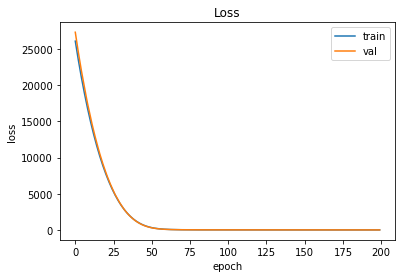

y_weights
[array([[1.0000002],
       [1.9999999],
       [3.0000005]], dtype=float32), array([1.0000006], dtype=float32)]


In [1]:
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

c0 = 1; c1 = 1; c2 = 2; c3 = 3

x_train = np.random.rand(1000,1) * 10 - 5
y_train = c0 + c1 * x_train +  c2 * x_train**2 + c3 * x_train**3

x = layers.Input(shape=(1,), name='x')

h1_A, h1_B, h1_C = layers.Lambda(lambda x: [x, x**2, x**3], name='h1_ABC')(x)
h2 = layers.Concatenate(name='concat')([h1_A, h1_B, h1_C])
y = layers.Dense(1, name='y')(h2)

model = models.Model(x, y)
model.summary()

model.compile('adam', 'mse')
hist = model.fit(x_train, y_train, batch_size=8, epochs=200, validation_split=0.2)

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

y_weights = model.get_layer('y').get_weights()
print('y_weights'); print(y_weights)